# Machine Learning 2022-2023 - UMONS

# Introduction to regression and classification with Scikit-Learn

This notebook is an introduction to the library scikit-learn (https://scikit-learn.org/stable/), which provides numerous tools to easily perform machine learning tasks. 

In this lab, we'll experiment with two of the most frequently encountered tasks in machine learning : 
  - Regression : predicting a continuous variable given a set of predictors. 
  - Classification : predicting the class of a sample given a set of predictors.

In order for you to first have a good feeling of the general pipeline of a machine learning task, we'll experiment on the Pokemon dataset with two simple models : a linear regression, and a K-nearest neighbors classifier. 

**Import the necessary libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

**Load the 'Pokemon.csv' dataset as a Pandas Dataframe, change the Type 1 and Type 2 variables to categorical and replace 'Type 2' missing values by the corresponding value of the 'Type 1' variable.**

In [ ]:
## Read csv and load Pandas Dataframe.

df = pd.read_csv('data/Pokemon.csv')
df.head()

In [ ]:
## Change variables types

print(df.dtypes)

df = df.astype({'Type 1': 'category', 'Type 2': 'category', 'Generation': 'category'})

print(df.dtypes)

In [ ]:
## Check for any missing values, replace them with the corresponding value of the 'Type 1' variable.

print(df.isna().sum())

df['Type 2'].fillna(df['Type 1'], inplace=True)

df.isna().sum()

**Select the target variable y as 'HP' and the predictor as 'Attack'. Create a scatter plot of the two variables.**

In [ ]:
## Select a target variable y and a predictor X.

y = df[['HP']]
X = df[['Attack']]

In [ ]:
## Create the scatter plot.

sns.scatterplot(x='Attack', y='HP', data=df)

**Split the dataset into training and test sets following an 80%/20% partition.**

In [ ]:
# Define a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, shuffle=True, random_state=0
)

print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

**Build a linear regression model and fit it to the training data.**

In [ ]:
## Define the linear regression model.

model = LinearRegression(fit_intercept=True)

In [ ]:
## Fit the model to the training data.

model.fit(X_train, y_train)

**Compute the mean squared error (MSE) on both the training and test sets.**

In [ ]:
## Make predictions for both the training and the test sets.

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Compute the coefficient of determination and the mean square error on both sets.

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE on training set : {MSE_train}')
print(f'MSE on test set : {MSE_test}')

**Plot the regression line**

In [ ]:
## Generate predictions out of the fitted model.

xfit = np.linspace(0, 200)
xfit = xfit[:, np.newaxis]
yfit = model.predict(xfit)

## Plot the regression line.

fig, ax = plt.subplots()
ax = sns.scatterplot(x='Attack', y='HP', data=df)
ax.plot(xfit, yfit, label='Regression line', color='red')
ax.legend()

## Regression task with a Linear Regression model. 

**1) Your turn ! Select 'Attack' and 'Defense' as predictor variables, and 'HP' as target variable.**

In [12]:
X = df[['Attack', 'Defense']]
y = df[['HP']]

**2) Split the dataset into a training and a test set. Follow an 80%/20% split partition, and make sure the dataset is shuffled.** 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, shuffle=True, random_state=0
)

**3) Fit a Linear Regression model to the training data.** 

In [14]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

**4) What is the expression of the fitted model ? You need to access the model's parameters to answer this question.**

In [15]:
coef = model.coef_
intercept = model.intercept_

print(f'Model\'s coefficients : {coef}')
print(f'Model\'s intercept : {intercept}')

Model's coefficients : [[0.29504121 0.08882897]]
Model's intercept : [38.66307442]


The (multiple) linear regression model with two predictors writes $\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2$. In our case, given the model's parameters, we have $\hat{\text{HP}} = 38.66 + 0.29~\text{Attack}+ 0.09~\text{Defense}$.

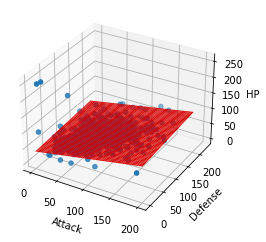

In [16]:
##Plot the regression plane##

z = df['Defense']
x = df['Attack']
xf = np.linspace(0, 200)
zf = np.linspace(0, 200)
xx, zz = np.meshgrid(xf, zf)

xx_new = xx.flatten()[:, np.newaxis]
zz_new = zz.flatten()[:, np.newaxis]

Xfit = np.concatenate((xx_new, zz_new), axis=-1)
yfit = model.predict(Xfit)
yfit = yfit[:, np.newaxis].reshape(xx.shape[0], xx.shape[1])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, z, y)
ax.plot_surface(xx, zz, yfit, color='red')
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')

plt.show()

**5) Using the fitted Linear Regression model, predict the values of the target variable 'HP' in the training and test sets.**

In [17]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

**6) For both the training and test sets, evaluate the model's predictions using the Mean Squared Error (MSE). What do you observe ?**

In [18]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE on training set : {MSE_train}')
print(f'MSE on test set : {MSE_test}')

MSE on training set : 480.61815354573235
MSE on test set : 747.8547312682159


The test error is greater than the training error. This is an expected behaviour as the model didn't get access to the test data during training. 

**7) Consider the variable 'Generation' as additional predictor. What is the data type of this variable, and how would you treat it ?**

**7.1) Retrieve the categories of the variable 'Generation'.**

In [25]:
# 'Generation' is a categorical variable, so we cannot feed it 'as is' to the model. 
# We'll use the OneHotEncoder class to preprocess it, which will create a new binary variable 
# (also called 'dummy variable') for each of the K categories of 'Generation'.

print(df['Generation'].cat.categories)

# Here, 'Generation' possesses 6 categories, so the one-hot-encoding will create 6 binary variables. 
# For each dummy variable, a '1' means that the observation belongs to that category, while a '0' 
# means it does not. Note that as each observation belongs to a single category, only 1 of the 6 
# dummy variables will take on the value '1', while the rest will be '0's.

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')


**7.2) Create a variable 'X' containing the predictors 'Attack', 'Defense', and 'Generation', and a variable 'y' containing the target variable 'HP'.**

In [26]:
X = df[['Attack', 'Defense', 'Generation']]
y = df[['HP']]

**7.3) Split the dataset intro training and test sets following a 80/20 partition.**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, shuffle=True, random_state=0
)

**7.4) Create a 'One Hot Encoding' for each category of the variable 'Generation'. The one-hot-encoder should be fit exclusively to the training set, while the test set should only be transformed. 
Look up the class OneHotEncoder of Scikit-Learn, as well as the methods 'fit_transform' and 'transform'. Make sure to drop the first category and to ignore unknown category in the test set.**

In [28]:
ohe = OneHotEncoder(drop='first')

## We drop the first category as it can be uniquely retrieved from the other 5. 

X_train_cat = ohe.fit_transform(X_train[['Generation']])
X_train_cat = pd.DataFrame(X_train_cat.toarray())


X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train[['Attack', 'Defense']], X_train_cat], axis=1)

X_test_cat = ohe.transform(X_test[['Generation']])
X_test_cat = pd.DataFrame(X_test_cat.toarray())

X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test[['Attack', 'Defense']], X_test_cat], axis=1)

## Check that we have 7 columns in X_train and X_test

print(X_train.shape)
print(X_test.shape)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
(640, 7)
(160, 7)


Any pre-processing step must be fitted to the training data only, as it would otherwise result in data leakage (i.e. the model having access to information contained in the test set during training). Once it is fitted to the training set, it can be then applied to the test set. 

If you were to replace missing values with a column statistic (i.e. mean, media, max, min, etc...), this comment holds. As in our case we decided to replace the missing 'Type 2' values by their associated 'Type 1' values, we do not risk introducing data leakage, so the operation was applied to the entire dataset.  

**7.4) Fit the Linear Regression model to the training set, and get the model's coefficients. How does the model write now ?**

In [ ]:
model.fit(X_train, y_train)
coef = model.coef_
intercept = model.intercept_

print(f'Model\'s coefficients: {coef}')
print(f'Model\'s intercept: {intercept}')

The model now writes $\hat{\text{HP}} = 35.95 + 0.30~\text{Attack} + 0.08~\text{Defense} + 6.23~G_2 + 0.65~G_3 + 5.69~G_4 + 4.52~G_5 + 1.17 ~G_6$, where $G_i$ is the dummy variable associated to Generation $i$. 

**7.5) Predict the MSE on the training and test sets.**

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE on training set: {MSE_train}')
print(f'MSE on test set: {MSE_test}')

## Classification Task with a KNN classifier.

**8) Plot two scatter plots with:**
- **'Attack' on the x-axis, 'HP' on the y-axis'.**
- **'Attack' on the x-axis, 'Defense' on the y-axis.**

**Indicate legendary and non-legendary Pokemons with a color. What do you observe?**

**9) Use the `KNeighborsClassifier` class of scikit-learn with 5 neighbors to predict whether a Pokemon is legendary or not, using the variables 'Attack', 'Defense', and 'HP' as features. To this end, apply the following steps:**
- **Select the features and the target variable. Make sure that the data type of 'Legendary' is set to 'int'.**
- **Split your dataset into a training and test set following a 80%/20% partition.**
- **Fit the model to the training set, and predict the variable 'Legendary' on the training and test sets.**

**10) Compute the accuracy score of the model's predictions on the training and test sets using the function `accuracy_score`.** 

**11) Look at the distribution of the variable 'Legendary' in the training and test dataset using `sns.countplot`. What do you observe?**

**12) Get the confusion matrix of the predictions on the test set using the `confusion_matrix` function. What do you observe and how do you link your observations to the accuracy of the model?**